In [3]:
import LinearRegression as LR
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sb
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('AirQualityUCI.csv')
df.drop(['un1','un2','AH'],axis=1,inplace=True)
df.replace('', np.nan,inplace=True)
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Date'] = df['Date'].dt.month
df['Time'] = df['Time'].dt.hour
df = df.drop_duplicates()


In [5]:
df

Date  Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
0       10    18     2.6         1360       150      11.9           1046   
1       10    19     2.0         1292       112       9.4            955   
2       10    20     2.2         1402        88       9.0            939   
3       10    21     2.2         1376        80       9.2            948   
4       10    22     1.6         1272        51       6.5            836   
...    ...   ...     ...          ...       ...       ...            ...   
9352     4    10     3.1         1314      -200      13.5           1101   
9353     4    11     2.4         1163      -200      11.4           1027   
9354     4    12     2.4         1142      -200      12.4           1063   
9355     4    13     2.1         1003      -200       9.5            961   
9356     4    14     2.2         1071      -200      11.9           1047   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  
0         166          1056      113          1692         1268  13.6  48.9  
1         103          1174       92          1559          972  13.3  47.7  
2         131          1140      114          1555         1074  11.9  54.0  
3         172          1092      122          1584         1203  11.0  60.0  
4         131          1205      116          1490         1110  11.2  59.6  
...       ...           ...      ...           ...          ...   ...   ...  
9352      472           539      190          1374         1729  21.9  29.3  
9353      353           604      179          1264         1269  24.3  23.7  
9354      293           603      175          1241         1092  26.9  18.3  
9355      235           702      156          1041          770  28.3  13.5  
9356      265           654      168          1129          816  28.5  13.1  

[9357 rows x 14 columns]

                   Date      Time    CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
Date           1.000000  0.001584 -0.044502    -0.101230 -0.148170 -0.089438   
Time           0.001584  1.000000  0.075984     0.196780  0.049371  0.046087   
CO(GT)        -0.044502  0.075984  1.000000     0.041411  0.128351 -0.031378   
PT08.S1(CO)   -0.101230  0.196780  0.041411     1.000000  0.170007  0.852687   
NMHC(GT)      -0.148170  0.049371  0.128351     0.170007  1.000000  0.037323   
C6H6(GT)      -0.089438  0.046087 -0.031378     0.852687  0.037323  1.000000   
PT08.S2(NMHC) -0.016029  0.282315  0.029926     0.933102  0.110104  0.767433   
NOx(GT)        0.042847  0.225153  0.526451     0.277993 -0.004427 -0.001174   
PT08.S3(NOx)  -0.088615 -0.256172 -0.089981     0.087019  0.048821  0.512193   
NO2(GT)       -0.087218  0.219483  0.671127     0.154030  0.103307 -0.010992   
PT08.S4(NO2)  -0.022001  0.147978 -0.073724     0.845149  0.162680  0.774673   
PT08.S5(O3)   -0.021557  0.198014  0.080

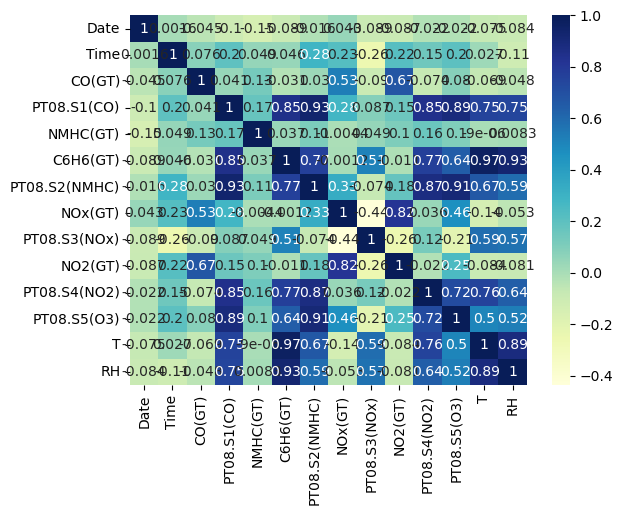

In [6]:
print(df.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [12]:
arr = df.to_numpy()

X = arr[:, 0:13]
Y = arr[:,13]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42,train_size=0.9)
scaler = StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
X_train2=X_train
m = X_train2.shape[0]
X_train2 = np.concatenate([np.ones(m).reshape(m, 1),X_train2],axis=1)






In [14]:
print(LR.fitNormal(X_train2,Y_train))



[ 3.93553260e+01  1.79494659e+00 -1.59214762e-02  4.38453847e-01
  5.10035527e+00 -1.61951136e+00  1.45219434e+02 -6.50540941e+01
  4.54791881e+00 -1.15448528e+01 -4.05713389e+00  2.50465131e+01
  1.67064486e+00 -6.80607900e+01]


In [15]:
print(LR.run_gradient_descent(X_train,Y_train,0.01,1000))

Final Estimate of theta :  [ 39.3553259    0.49061842  -4.53736587   0.76101284  19.47742304
  -1.56547699  31.28974677 -19.87431733   5.31199808   6.48595128
  -5.98968162  -1.63270749   5.80431279   9.10104781]
(     iteration         cost
0          0.0  3911.590791
10        10.0  1869.223936
20        20.0  1234.633345
30        30.0   917.887944
40        40.0   725.638468
..         ...          ...
950      950.0   236.230171
960      960.0   235.649354
970      970.0   235.074006
980      980.0   234.504029
990      990.0   233.939328

[100 rows x 2 columns], array([ 39.3553259 ,   0.49061842,  -4.53736587,   0.76101284,
        19.47742304,  -1.56547699,  31.28974677, -19.87431733,
         5.31199808,   6.48595128,  -5.98968162,  -1.63270749,
         5.80431279,   9.10104781]))


Final Estimate of theta :  [ 39.35532597   1.47856042  -1.25298663   0.48679825  12.79810698
  -1.5921415  105.7496262  -54.96364031   5.77945503  -6.47633909
  -5.23591449  17.30344564   3.40196054 -40.08164346]


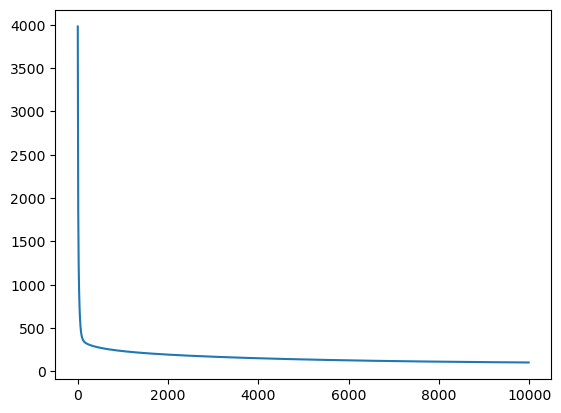

In [17]:
cost,theta=LR.run_gradient_descent(X_train,Y_train,0.01,10000)
plt.plot(cost['iteration'],cost['cost'])